Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Making graph for 2018-06-07


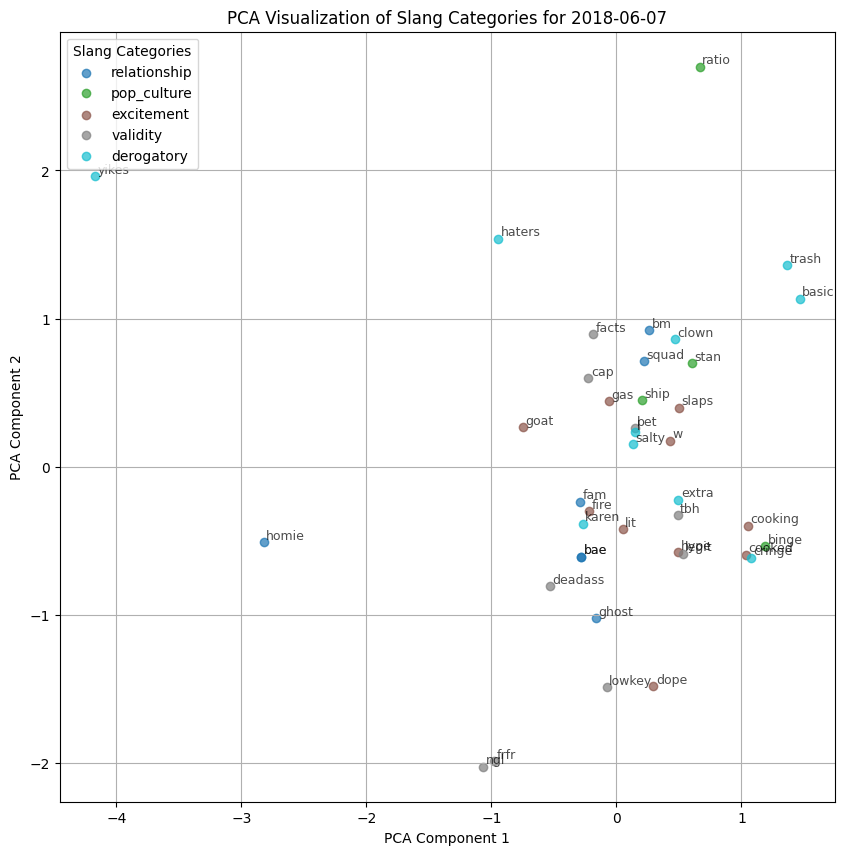

Making graph for 2019-06-18


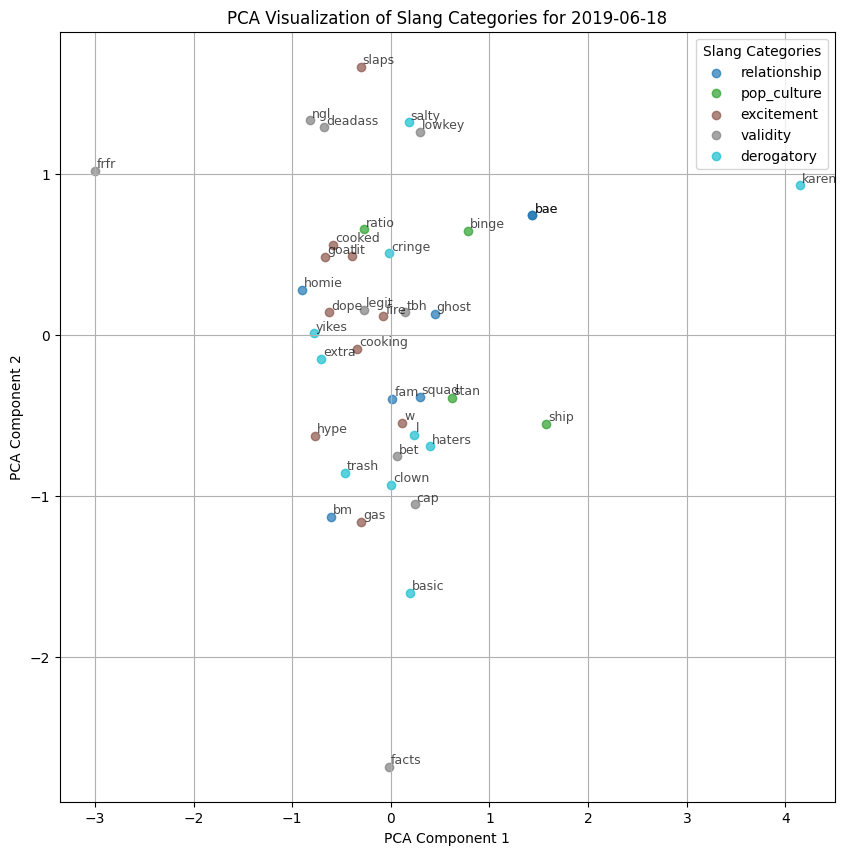

Making graph for 2020-06-18


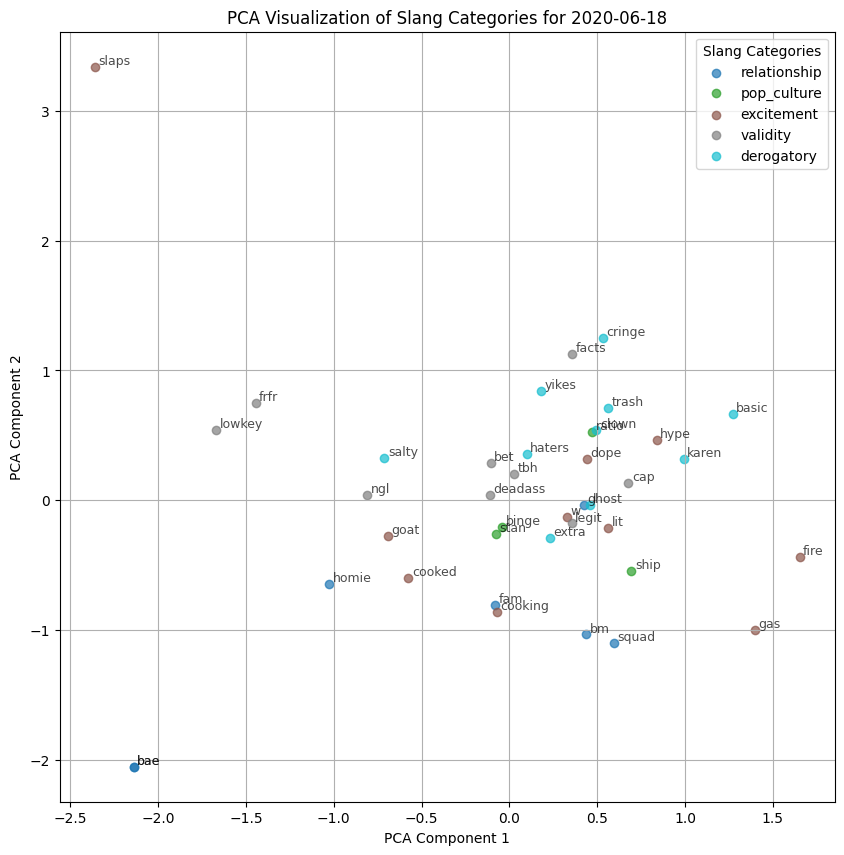

Making graph for 2021-06-18


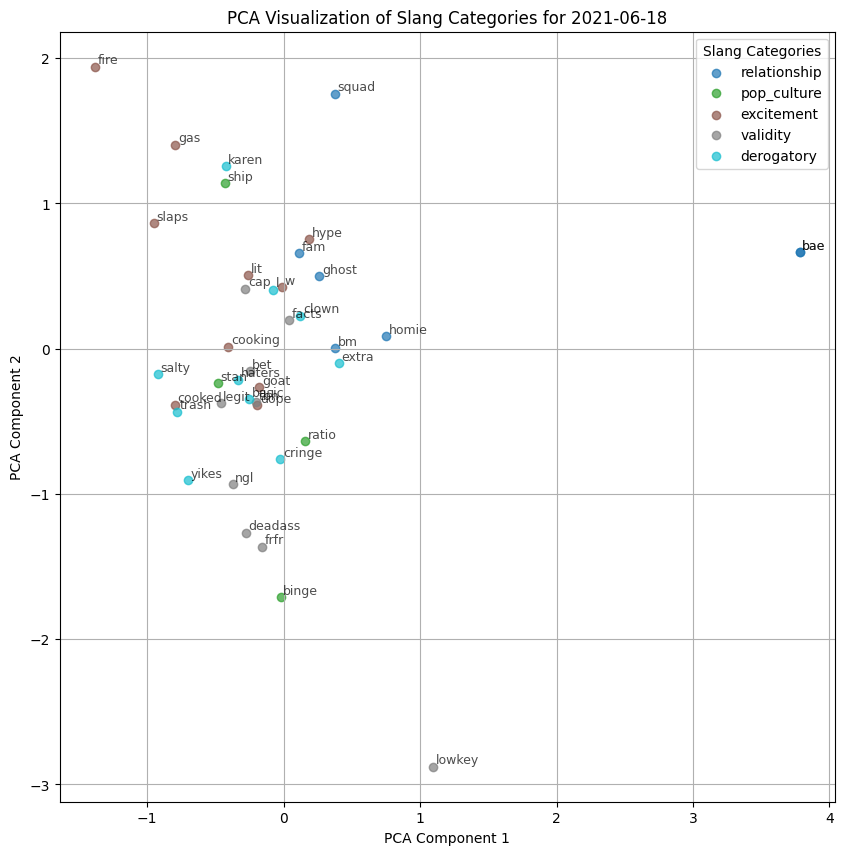

Making graph for 2022-06-18


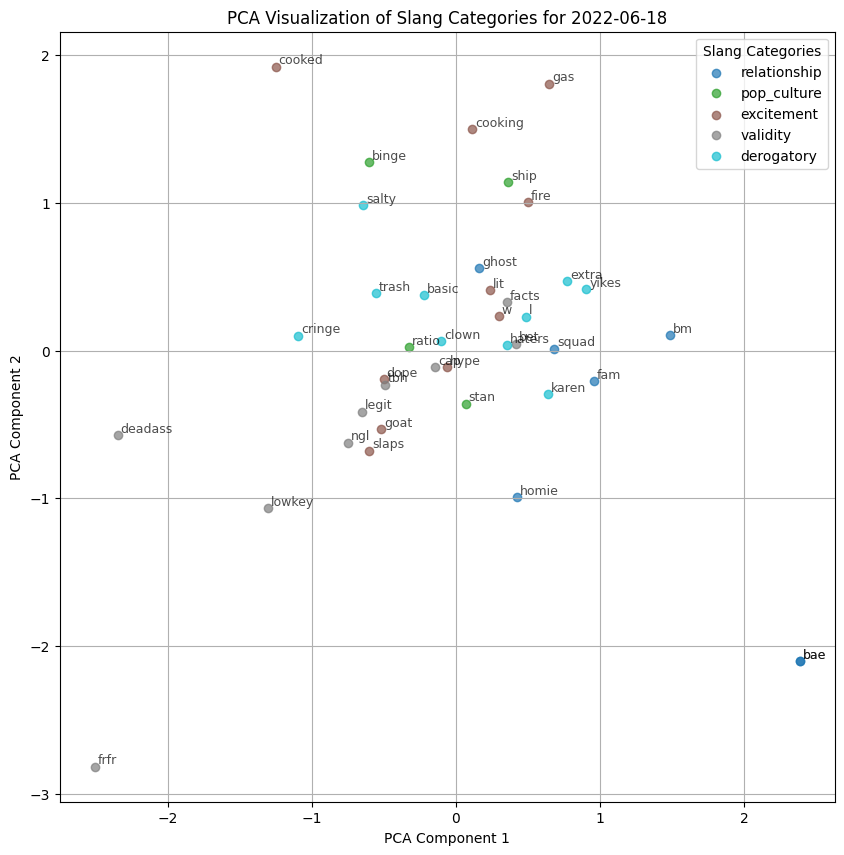

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import FastText
from gensim.models import KeyedVectors
from google.colab import drive
drive.mount('/content/drive')

slang_categories = {
    'relationship' : ['bae', 'bm', 'bae', 'fam', 'homie', 'squad', 'ghost'],
  'pop_culture' : ['stan', 'binge', 'ship', 'ratio'],
  'excitement' : ['fire', 'slaps', 'gas', 'cooked', 'cooking', 'lit', 'goat', 'w', 'hype', 'dope'],
  'validity' : ['frfr', 'cap', 'ngl', 'tbh', 'deadass', 'facts', 'lowkey', 'legit', 'bet'],
  'derogatory' : ['clown', 'cringe', 'karen', 'extra', 'basic', 'yikes', 'l', 'haters', 'trash', 'salty'],
}


filenames = ['2018-06-07', '2019-06-18', '2020-06-18', '2021-06-18', '2022-06-18']
for f in filenames:
  print(f'Making graph for {f}')
  model = FastText.load(f'/content/drive/MyDrive/SLANGuage_Data/aligned_embeddings/{f}-aligned.model')
  all_words = []
  labels = []
  embeddings = []

  for category, words in slang_categories.items():
      for word in words:
          try:
              embeddings.append(model.wv[word])
              all_words.append(word)
              labels.append(category)
          except KeyError:
              print(f"Word '{word}' not found in vocabulary, skipping.")
  embeddings = np.array(embeddings)
  pca = PCA(n_components=2)
  reduced_embeddings = pca.fit_transform(embeddings)

  pca = PCA(n_components=2)
  plt.figure(figsize=(10, 10))

  categories = list(slang_categories.keys())
  colors = plt.cm.tab10(np.linspace(0, 1, len(categories)))

  for i, category in enumerate(categories):
    category_indices = [j for j, label in enumerate(labels) if label == category]
    plt.scatter(
        reduced_embeddings[category_indices, 0],
        reduced_embeddings[category_indices, 1],
        label=category,
        color=colors[i],
        alpha=0.7
    )
  # Add annotations for words
  for i, word in enumerate(all_words):
      plt.text(reduced_embeddings[i, 0] + 0.02, reduced_embeddings[i, 1] + 0.02, word, fontsize=9, alpha=0.7)

  plt.title(f"PCA Visualization of Slang Categories for {f}")
  plt.xlabel("PCA Component 1")
  plt.ylabel("PCA Component 2")
  plt.legend(title="Slang Categories")
  plt.grid(True)
  plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


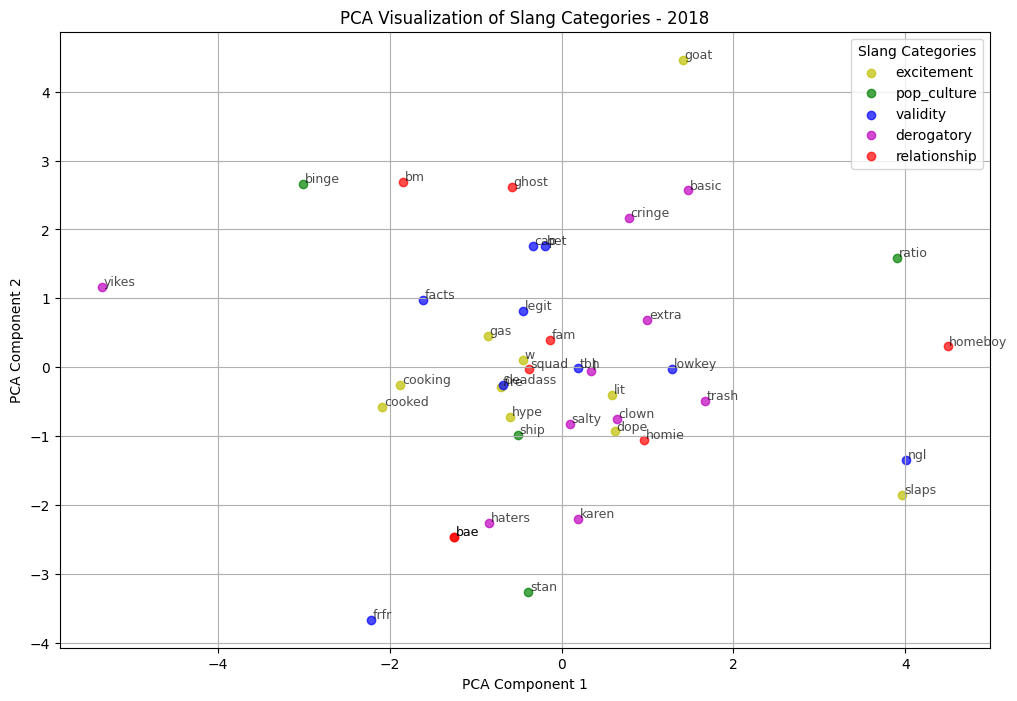

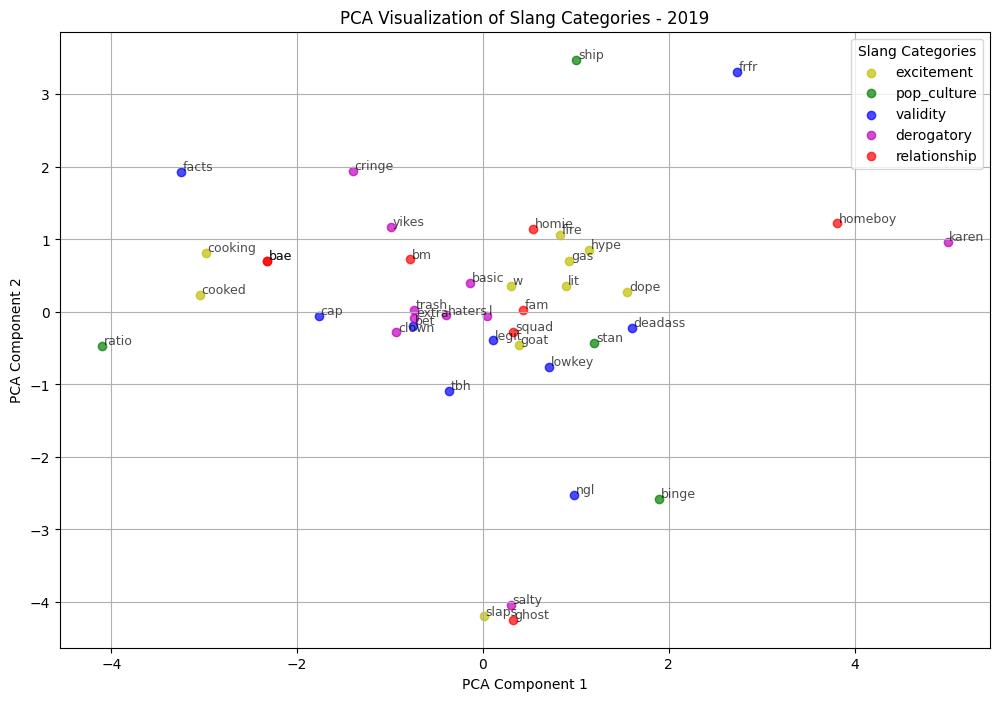

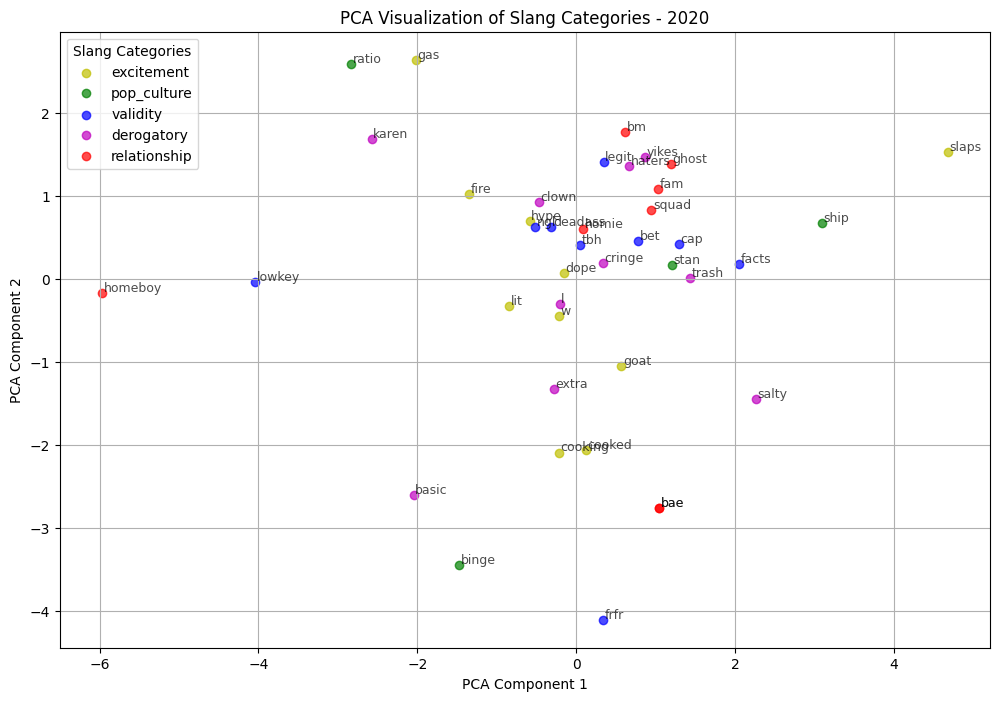

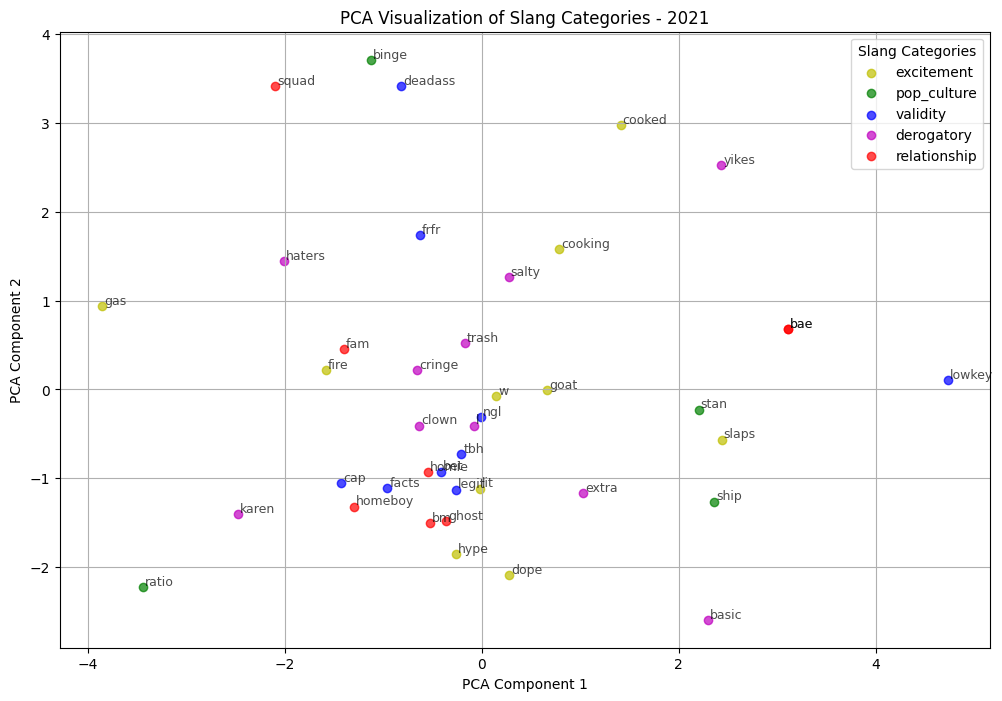

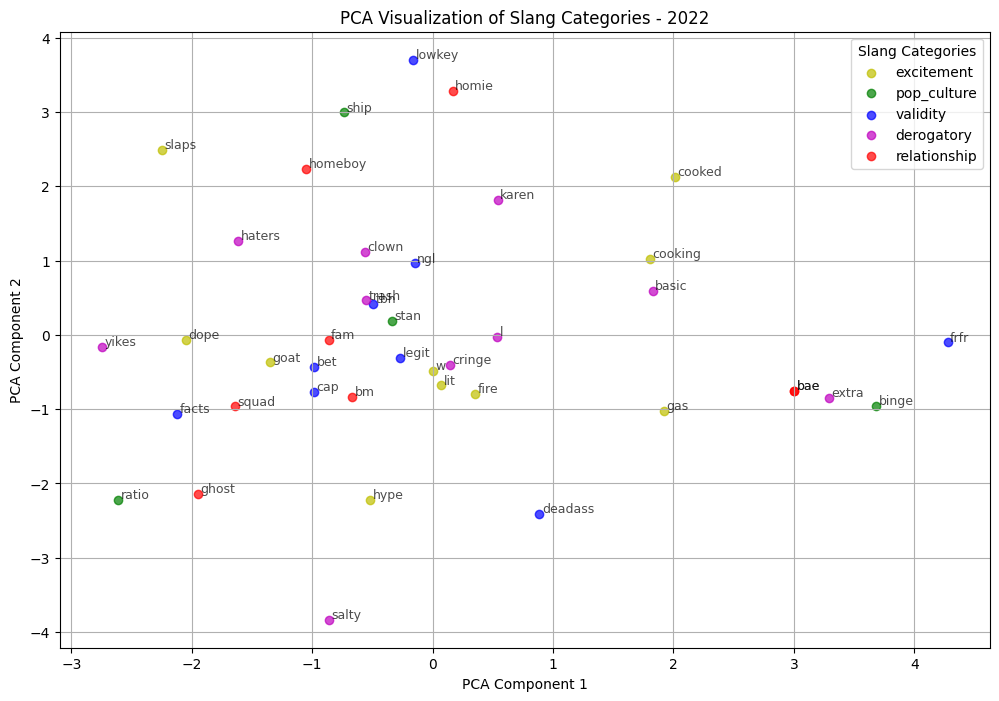

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import FastText
from collections import defaultdict
from google.colab import drive
drive.mount('/content/drive')

def get_pca_embeddings(model, words):
    """Extract PCA-reduced embeddings from a FastText model for given words."""
    embeddings = []
    valid_words = []
    for word in words:
        try:
            embeddings.append(model.wv[word])
            valid_words.append(word)
        except KeyError:
            print(f"Word '{word}' not found in vocabulary, skipping.")

    # Perform PCA reduction
    if embeddings:
        pca = PCA(n_components=2)
        reduced_embeddings = pca.fit_transform(np.array(embeddings))
        return reduced_embeddings, valid_words
    else:
        return np.array([]), []

def visualize_pca(reduced_embeddings, valid_words, labels, year):
    """Visualize the PCA embeddings for a specific year."""
    if len(reduced_embeddings) != len(valid_words):
        print(f"Warning: Mismatch between valid words ({len(valid_words)}) and embeddings ({len(reduced_embeddings)}).")
        valid_words = valid_words[:len(reduced_embeddings)]  # Truncate to match the size

    plt.figure(figsize=(12, 8))

    # Assign unique colors to each category
    cat_colors = {
        'relationship': 'r',  # Red
        'pop_culture': 'g',  # Green
        'validity': 'b',  # Blue
        'excitement': 'y',  # Yellow
        'derogatory': 'm'  # Magenta
    }


    categories = list(set(labels))

    for i, category in enumerate(categories):
        category_indices = [j for j, label in enumerate(labels) if label == category]
        plt.scatter(
            reduced_embeddings[category_indices, 0],
            reduced_embeddings[category_indices, 1],
            label=category,
            color=cat_colors[category],
            alpha=0.7
        )

    # Add annotations for words
    for i, word in enumerate(valid_words):
        plt.text(reduced_embeddings[i, 0] + 0.02, reduced_embeddings[i, 1] + 0.02, word, fontsize=9, alpha=0.7)

    plt.title(f"PCA Visualization of Slang Categories - {year}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Slang Categories")
    plt.grid(True)
    plot_path = f'/content/drive/MyDrive/SLANGuage_Data/plots/slang_pca_{year}.png'
    plt.savefig(plot_path)
    plt.show()
    plt.close()

# Example usage
slang_categories = {
  'relationship' : ['bae', 'bm', 'bae', 'fam', 'homeboy', 'homie', 'squad', 'ghost'],
  'pop_culture' : ['stan', 'binge', 'ship', 'ratio'],
  'excitement' : ['fire', 'slaps', 'gas', 'cooked', 'cooking', 'lit', 'goat', 'w', 'hype', 'dope'],
  'validity' : ['frfr', 'cap', 'ngl', 'tbh', 'deadass', 'facts', 'lowkey', 'legit', 'bet'],
  'derogatory' : ['clown', 'cringe', 'karen', 'extra', 'basic', 'yikes', 'l', 'haters', 'trash', 'salty'],
}

filenames = ['2018-06-07', '2019-06-18', '2020-06-18', '2021-06-18', '2022-06-18']
years = [filename.split('-')[0] for filename in filenames]
models = [FastText.load(f'/content/drive/MyDrive/SLANGuage_Data/aligned_embeddings/{f}-aligned.model') for f in filenames]

embeddings_per_year = []
all_valid_words = []
all_labels = []

for model, year in zip(models, years):
    labels = []
    all_words = []
    all_embeddings = []

    for category, words in slang_categories.items():
        reduced_embeddings, valid_words = get_pca_embeddings(model, words)
        if len(reduced_embeddings) > 0:
            all_embeddings.extend(reduced_embeddings)
            all_valid_words.extend(valid_words)
            labels.extend([category] * len(valid_words))

    embeddings_per_year.append(np.array(all_embeddings))
    visualize_pca(np.array(all_embeddings), all_valid_words, labels, year)


In [ ]:
import numpy as np

def calculate_delta(embeddings1, embeddings2):
    """Calculates the delta between two sets of embeddings."""
    if len(embeddings1) != len(embeddings2):
        print("Error: Embeddings must have the same length for delta calculation.")
        return None

    delta = embeddings1 - embeddings2
    return delta

def analyze_word_deltas(embeddings_per_year, all_valid_words, all_labels, years):
    """Analyzes the delta in word embeddings across years for each category and individual word."""

    num_years = len(years)

    for i in range(num_years - 1):
        print(f"Delta Analysis between {years[i]} and {years[i+1]}")
        delta_embeddings = calculate_delta(embeddings_per_year[i+1], embeddings_per_year[i])
        if delta_embeddings is not None:

            # Analyze by category
            for category in set(all_labels):
                category_indices = [j for j, label in enumerate(all_labels) if label == category]
                if category_indices:
                    # Ensure category_indices are used to extract the delta embeddings corresponding to the category
                    category_deltas = delta_embeddings[category_indices]
                    avg_delta = np.mean(np.linalg.norm(category_deltas, axis=1))
                    print(f"Average delta for category '{category}': {avg_delta}")

            # Analyze by word
            for j, word in enumerate(set(all_valid_words)):
                # Get the index for the word (assuming the order in all_valid_words matches delta_embeddings)
                word_indices = [idx for idx, w in enumerate(all_valid_words) if w == word]
                if word_indices:
                    word_delta = np.linalg.norm(delta_embeddings[word_indices[0]])  # Assuming 1-to-1 correspondence
                    if word_delta > 1.0:
                      print(f"  Delta for word '{word}': {word_delta}")


analyze_word_deltas(embeddings_per_year, all_valid_words, all_labels, years)

Delta Analysis between 2018 and 2019
  Delta for word 'ghost': 6.920700550079346
  Delta for word 'bet': 2.0398266315460205
  Delta for word 'homeboy': 1.1401145458221436
  Delta for word 'bm': 2.231616735458374
  Delta for word 'ratio': 8.264646530151367
  Delta for word 'legit': 1.3306769132614136
  Delta for word 'cringe': 2.190884590148926
  Delta for word 'extra': 1.9005012512207031
  Delta for word 'homie': 2.238173723220825
  Delta for word 'tbh': 1.205884575843811
  Delta for word 'facts': 1.893377661705017
  Delta for word 'fire': 2.0435726642608643
  Delta for word 'slaps': 4.600278854370117
  Delta for word 'clown': 1.646805763244629
  Delta for word 'yikes': 4.358424186706543
  Delta for word 'trash': 2.463965892791748
  Delta for word 'gas': 1.8038430213928223
  Delta for word 'haters': 2.259282112121582
  Delta for word 'deadass': 2.2883505821228027
  Delta for word 'ship': 4.715979099273682
  Delta for word 'salty': 3.2222113609313965
  Delta for word 'cap': 2.3086943626

In [ ]:
# Take the CSV with ONLY SELECTED SLANG and store into a dictionary

import csv

slanglist_rebuilt_db = {}

with open('/content/drive/MyDrive/SLANGuage_Data/slang_word_similarities.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        word = row['word']
        year = row['year']
        neighbor = row['neighbor']
        similarity = float(row['similarity'])



        if word not in slanglist_rebuilt_db:
          slanglist_rebuilt_db[word] = {}
        if year not in slanglist_rebuilt_db[word]:
            slanglist_rebuilt_db[word][year] = []
        slanglist_rebuilt_db[word][year].append((neighbor, similarity))



In [5]:
# Graph the years of a word.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import FastText
from gensim.models import KeyedVectors
from google.colab import drive
drive.mount('/content/drive')

def graph_word(word, foldername, save_to_drive):

    all_embeddings = []
    all_neighbors = []
    all_years = []

    filenames = ['2018-06-07', '2019-06-18', '2020-06-18', '2021-06-18', '2022-06-18']

    for f in filenames:
      year_embeddings = []
      model = FastText.load(f'/content/drive/MyDrive/SLANGuage_Data/aligned_embeddings/{f}-aligned.model')


      for neighbor, _ in slanglist_rebuilt_db[word][f[:4]]:
          try:
            embedding = model.wv[neighbor]
            year_embeddings.append(embedding)
            all_neighbors.append(neighbor)
            all_years.append(f[:4])
          except KeyError:
            print(f"Word '{neighbor}' not found in {year}.")

      all_embeddings.extend(year_embeddings)

    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(all_embeddings)

    # Plot
    plt.figure(figsize=(10,10))

    year_colors = {
        '2018': 'r',  # Red
        '2020': 'g',  # Green
        '2021': 'b',  # Blue
        '2022': 'y',  # Yellow
    }

    for i, year in enumerate(all_years):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], color=year_colors[year], label=year, alpha=0.7)

    for i, neighbor in enumerate(all_neighbors):
        plt.text(reduced_embeddings[i, 0] + 0.02, reduced_embeddings[i, 1] + 0.02, neighbor, fontsize=9, alpha=0.7)

    plt.title(f"PCA Visualization of neighbors for {word}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)

    if save_to_drive:
      filepath = f'/content/drive/MyDrive/SLANGuage_Data/graphs/pop_culture/{word}_neighbors_pca.png'
      plt.savefig(filepath)
      print(f"Graph for {word} saved to drive.")
    else:
      plt.show()

    plt.close()


Mounted at /content/drive


In [6]:
relationship = ['bae', 'bm', 'bae', 'fam', 'homeboy', 'homie', 'squad', 'ghost']
pop_culture = ['stan', 'binge', 'ship', 'ratio']
excitement = ['fire', 'slaps', 'gas', 'cooked', 'cooking', 'lit', 'goat', 'w', 'hype', 'dope']
validity = ['frfr', 'cap', 'ngl', 'tbh', 'deadass', 'facts', 'lowkey', 'legit', 'bet']
derogatory = ['clown', 'cringe', 'karen', 'extra', 'basic', 'yikes', 'l', 'haters', 'trash', 'salty']

for word in pop_culture:
  graph_word(word, pop_culture, False)

NameError: name 'slanglist_rebuilt_db' is not defined

In [7]:
### Use t-SNE to perform analysis with dimensionality reduction
from gensim.models import FastText
file_path = '/content/drive/MyDrive/SLANGuage_Data/aligned_embeddings/'

# Load the aligned models
model_2018 = FastText.load(f"{file_path}2018-06-07-aligned.model")
model_2019 = FastText.load(f"{file_path}2019-06-18-aligned.model")
model_2020 = FastText.load(f"{file_path}2020-06-18-aligned.model")
model_2021 = FastText.load(f"{file_path}2021-06-18-aligned.model")
model_2022 = FastText.load(f"{file_path}2022-06-18-aligned.model")

In [8]:
# Slang words organized by categories
relationship = ['bae', 'bm', 'fam', 'homeboy', 'homie', 'squad', 'ghost']
pop_culture = ['stan', 'binge', 'ship', 'ratio']
excitement = ['fire', 'slaps', 'gas', 'cooked', 'cooking', 'lit', 'goat', 'w', 'hype', 'dope']
validity = ['frfr', 'cap', 'ngl', 'tbh', 'deadass', 'facts', 'lowkey', 'legit', 'bet']
derogatory = ['clown', 'cringe', 'karen', 'extra', 'basic', 'yikes', 'l', 'haters', 'trash', 'salty']

# Combine all slang words into one list and assign labels
all_slang_words = relationship + pop_culture + excitement + validity + derogatory
labels = (['relationship'] * len(relationship) +
          ['pop_culture'] * len(pop_culture) +
          ['excitement'] * len(excitement) +
          ['validity'] * len(validity) +
          ['derogatory'] * len(derogatory))

In [9]:
# Function to extract embeddings for slang words
def extract_vectors_for_slang(model, slang_words):
    return np.array([model.wv[word] for word in slang_words if word in model.wv])

# Extract embeddings for each year
vectors_2018 = extract_vectors_for_slang(model_2018, all_slang_words)
vectors_2019 = extract_vectors_for_slang(model_2019, all_slang_words)
vectors_2020 = extract_vectors_for_slang(model_2020, all_slang_words)
vectors_2021 = extract_vectors_for_slang(model_2021, all_slang_words)
vectors_2022 = extract_vectors_for_slang(model_2022, all_slang_words)

# Combine vectors for all years
all_vectors = np.vstack([vectors_2018, vectors_2019, vectors_2020, vectors_2021, vectors_2022])

In [10]:
# Create metadata for each word
metadata = []
for year, vectors in zip(['2018', '2019', '2020', '2021', '2022'],
                         [vectors_2018, vectors_2019, vectors_2020, vectors_2021, vectors_2022]):
    for i, word in enumerate(all_slang_words):
        if word in model_2018.wv:  # Ensure the word exists in the embeddings
            metadata.append({'word': word, 'category': labels[i], 'year': year})

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
reduced_vectors = tsne.fit_transform(all_vectors)

# Extract metadata for plotting
categories = [meta['category'] for meta in metadata]
years = [meta['year'] for meta in metadata]
words = [meta['word'] for meta in metadata]

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


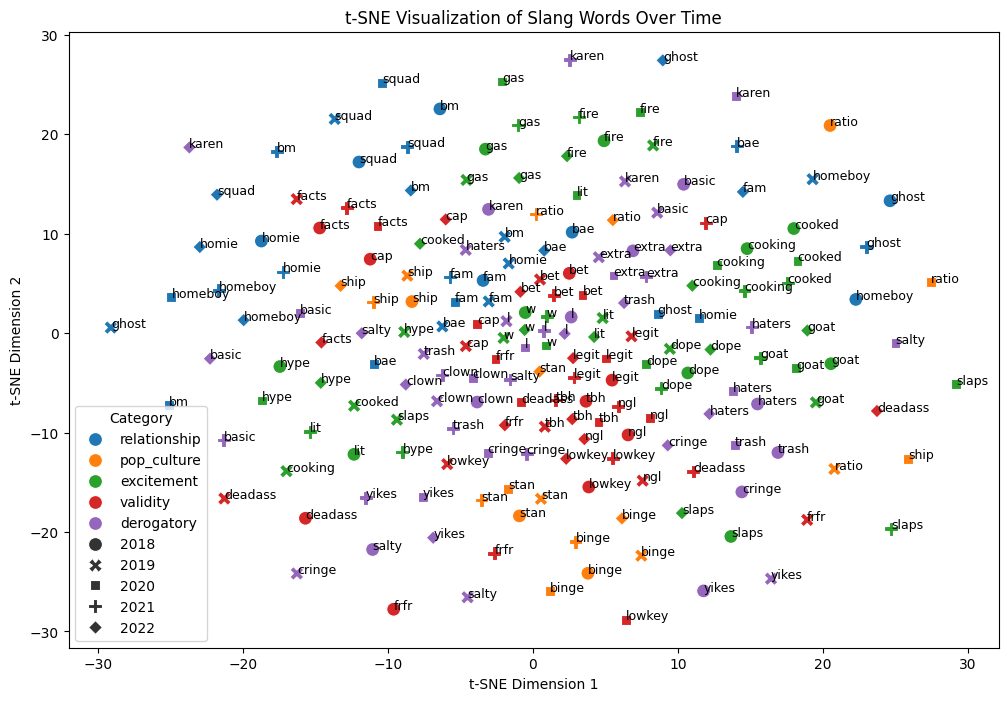

In [11]:
import seaborn as sns

# Plot t-SNE results by category
plt.figure(figsize=(12, 8))
sns.scatterplot(x=reduced_vectors[:, 0], y=reduced_vectors[:, 1], hue=categories, style=years, palette="tab10", s=100)

# Annotate points with slang words
for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9)

plt.title("t-SNE Visualization of Slang Words Over Time")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Category")

plt.savefig("/content/drive/MyDrive/SLANGuage_Data/plots/tsne_slang_words_over_time.png", format="png", dpi=300, bbox_inches="tight")  # Save as PNG with high resolution

plt.show()

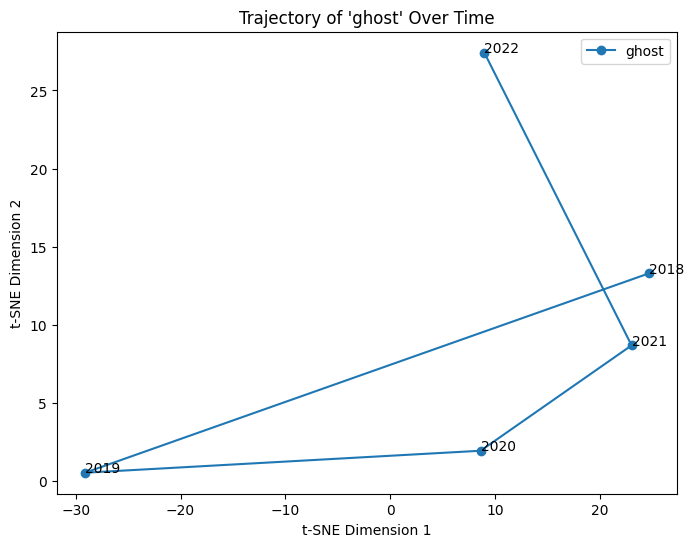

In [13]:
# Example: Track a specific slang word (e.g., "lit") over time
word_to_track = "ghost"
indices = [i for i, meta in enumerate(metadata) if meta['word'] == word_to_track]

# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(reduced_vectors[indices, 0], reduced_vectors[indices, 1], marker='o', label=word_to_track)
for i, year in enumerate(years):
    if i in indices:
        plt.annotate(year, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.title(f"Trajectory of '{word_to_track}' Over Time")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plot_path = f'/content/drive/MyDrive/SLANGuage_Data/plots/tsne_trajectory_{word_to_track}.png'
plt.savefig(plot_path)
plt.show()
plt.close()
